In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
print(f'Archivo cargado: {filename}')

Saving AAG.csv to AAG.csv
Archivo cargado: AAG.csv


In [ ]:
with open(filename, 'r', encoding="latin8") as f:
   articulos = pd.read_csv(f)

articulos.head(3)

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Zhang, L; Cross, AW",NaN,NaN,NaN,"Zhang, Liang; Cross, Adrian W.",NaN,NaN,Potentials of Machine Learning in Vacuum Elect...,IEEE TRANSACTIONS ON ELECTRON DEVICES,...,Science Citation Index Expanded (SCI-EXPANDED),Engineering; Physics,SF5MO,NaN,NaN,NaN,NaN,2024-09-26,WOS:000652799800068,View Full Record in Web of Science
1,J,"Chami, I; Abu-El-Haija, S; Perozzi, B; Re, C; ...",NaN,NaN,NaN,"Chami, Ines; Abu-El-Haija, Sami; Perozzi, Brya...",NaN,NaN,Machine Learning on Graphs: A Model and Compre...,JOURNAL OF MACHINE LEARNING RESEARCH,...,Science Citation Index Expanded (SCI-EXPANDED),Automation & Control Systems; Computer Science,G4BX6,NaN,NaN,NaN,NaN,2024-09-26,WOS:000988640500001,View Full Record in Web of Science
2,J,"Yang, YX; Li, W; Shen, JM; Wang, YY; Tuo, K; X...",NaN,NaN,NaN,Yang YuXiang; Li Wei; Shen JianMin; Wang YanYa...,NaN,NaN,Machine learning applications in phase transit...,SCIENTIA SINICA-PHYSICA MECHANICA & ASTRONOMICA,...,Emerging Sources Citation Index (ESCI),Astronomy & Astrophysics; Physics,Y9RY6,NaN,NaN,NaN,NaN,2024-09-26,WOS:001108572000011,View Full Record in Web of Science


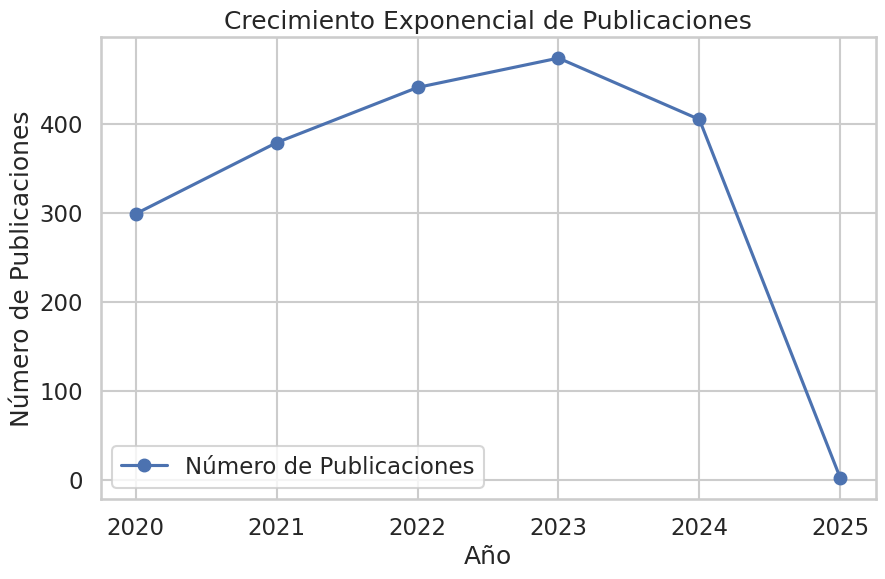

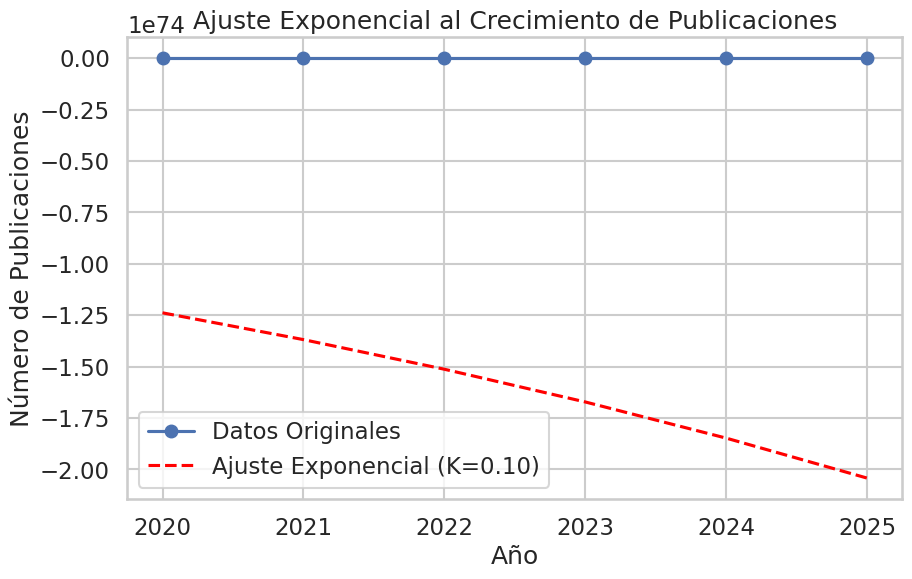

Índice de Price: 1.00


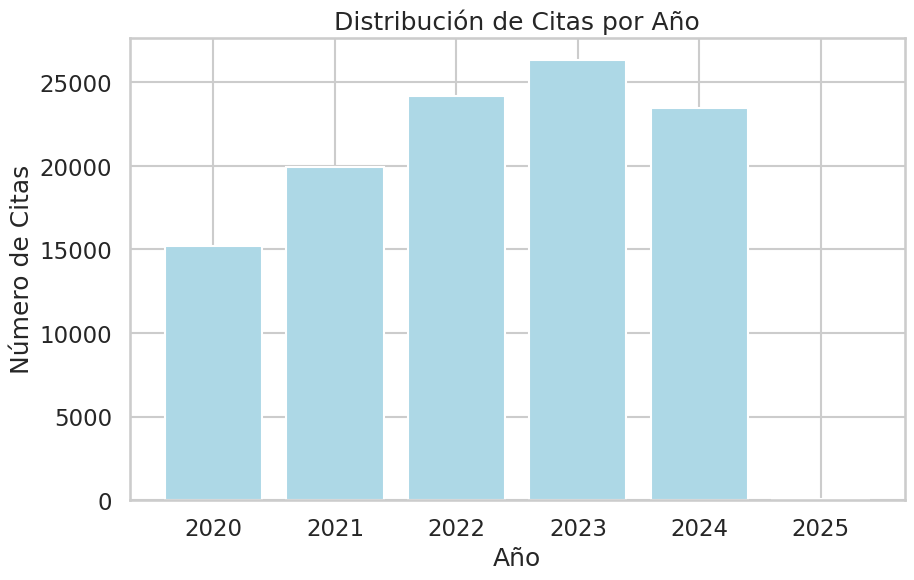

Relación Bradford: 1324:338:338 ≈ 1:0.26:0.07


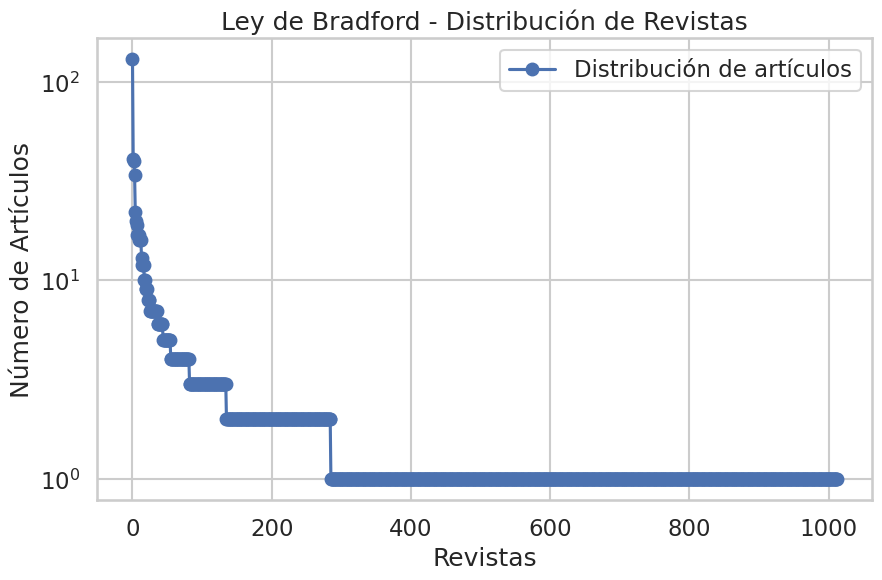

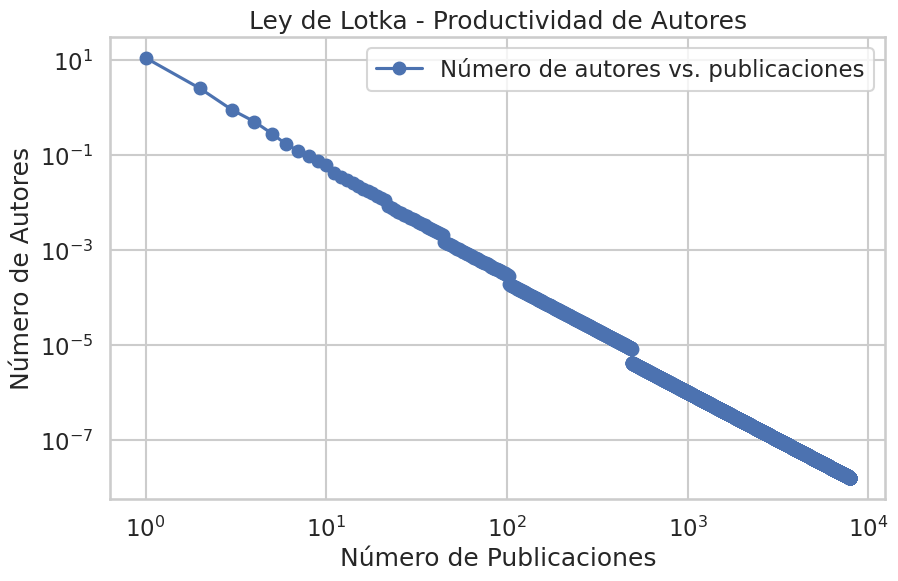

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ley del Crecimiento Exponencial de la Ciencia (Price)
def crecimiento_exponencial(articulos):
    publicaciones_por_ano = articulos['Publication Year'].value_counts().sort_index()
    t = np.array(publicaciones_por_ano.index)
    Y = np.array(publicaciones_por_ano.values)

    # Graficar crecimiento
    plt.figure(figsize=(10,6))
    plt.plot(t, Y, label='Número de Publicaciones', marker='o')
    plt.title('Crecimiento Exponencial de Publicaciones')
    plt.xlabel('Año')
    plt.ylabel('Número de Publicaciones')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Ajuste exponencial con el modelo Y(t) = A * e^(Kt)
    from scipy.optimize import curve_fit

    def modelo_exponencial(t, A, K):
        return A * np.exp(K * t)

    popt, pcov = curve_fit(modelo_exponencial, t, Y, p0=(1, 0.1), maxfev=5000)
    A, K = popt

    # Predicción y gráfico del ajuste
    Y_pred = modelo_exponencial(t, A, K)

    plt.figure(figsize=(10,6))
    plt.plot(t, Y, label='Datos Originales', marker='o')
    plt.plot(t, Y_pred, label=f'Ajuste Exponencial (K={K:.2f})', linestyle='--', color='red')
    plt.title('Ajuste Exponencial al Crecimiento de Publicaciones')
    plt.xlabel('Año')
    plt.ylabel('Número de Publicaciones')
    plt.legend()
    plt.grid(True)
    plt.show()

# Índice de Price
def indice_price(articulos, anio_actual):
    Ro = articulos[articulos['Publication Year'] >= (anio_actual - 5)]['Cited Reference Count'].sum()
    Rt = articulos['Cited Reference Count'].sum()

    IP = Ro / Rt
    print(f'Índice de Price: {IP:.2f}')

    # Gráfico del envejecimiento de las citas
    citas_por_ano = articulos.groupby('Publication Year')['Cited Reference Count'].sum()
    plt.figure(figsize=(10,6))
    plt.bar(citas_por_ano.index, citas_por_ano.values, color='lightblue')
    plt.title('Distribución de Citas por Año')
    plt.xlabel('Año')
    plt.ylabel('Número de Citas')
    plt.grid(True)
    plt.show()

    return IP

# Ley de Bradford
def ley_bradford(articulos):
    revistas = articulos['Source Title'].value_counts()
    n1 = revistas.iloc[:int(len(revistas)/3)].sum()
    n2 = revistas.iloc[int(len(revistas)/3):int(2*len(revistas)/3)].sum()
    n3 = revistas.iloc[int(2*len(revistas)/3):].sum()

    a = n2 / n1
    print(f'Relación Bradford: {n1}:{n2}:{n3} ≈ 1:{a:.2f}:{a**2:.2f}')

    # Gráfico de la Ley de Bradford
    plt.figure(figsize=(10,6))
    plt.plot(range(len(revistas)), revistas.values, label='Distribución de artículos', marker='o')
    plt.title('Ley de Bradford - Distribución de Revistas')
    plt.xlabel('Revistas')
    plt.ylabel('Número de Artículos')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()
    plt.show()

# Ley de Lotka
def ley_lotka(articulos):
    autores = articulos['Authors'].str.split(';').explode().value_counts()

    n = np.arange(1, len(autores)+1)
    y_n = autores.values / (n ** 2)

    # Graficar Ley de Lotka con escala log-log
    plt.figure(figsize=(10,6))
    plt.loglog(n, y_n, label='Número de autores vs. publicaciones', marker='o')
    plt.title('Ley de Lotka - Productividad de Autores')
    plt.xlabel('Número de Publicaciones')
    plt.ylabel('Número de Autores')
    plt.grid(True)
    plt.legend()
    plt.show()

def main(nombre_archivo):
    with open(filename, 'r', encoding="latin8") as f:
      articulos = pd.read_csv(f)

    articulos = articulos.dropna(subset=['Publication Year', 'Cited Reference Count', 'Source Title', 'Authors'])
    articulos['Publication Year'] = pd.to_numeric(articulos['Publication Year'], errors='coerce')
    articulos = articulos.dropna(subset=['Publication Year'])


    crecimiento_exponencial(articulos)

    # Índice de Price
    anio_actual = 2024
    indice_price(articulos, anio_actual)

    # Ley de Bradford
    ley_bradford(articulos)

    # Ley de Lotka
    ley_lotka(articulos)

nombre_archivo = 'articulos.csv'
main(nombre_archivo)

